In [8]:
import geopandas as gpd
import pandas as pd
import os.path
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import itertools

In [110]:
# def check_intersections(edges, edge_id_col, return_edges=True):

#     '''
#     Detects topological errors in gdf with edges from OSM data.
#     If two edges are intersecting (i.e. no node at intersection) and neither is tagged as a bridge or a tunnel,
#     it is considered an error in the data.

#     Arguments:
#         gdf (gdf): gdf with edges to check for missing intersection nodes
#         edge_id_col (str): name of column with unique edge_id
#         return_edges (boolean): if True, also return the edges identified as missing a node 

#     Returns:
#         intersection_issues (list): list with tuples with ids of edges missing an intersection node between them
#         edges_inter (gdf): geodataframe with edges missing an intersection node
#     '''

#     edges_subset = edges.loc[~(edges.tunnel.isin(['yes','Yes',True,'passage','building_passage','movable']) | edges.bridge.isin(['yes','Yes',True,'passage','building_passage','movable']) )]

#     overlay_edges = edges_subset.overlay(edges_subset, how='intersection', keep_geom_type=False)

#     edge_id_1 = edge_id_col+'_1'
#     edge_id_2 = edge_id_col+'_2'

#     overlay_selection = overlay_edges.loc[overlay_edges[edge_id_1] != overlay_edges[edge_id_2]]

#     if len(overlay_selection) > 0:

#         all_intersections = list(zip(overlay_selection[edge_id_1], overlay_selection[edge_id_2]))
#         all_intersections = [set(a) for a in all_intersections]
        
#         # Remove duplicaties
#         unique_intersections = [set(item) for item in set(frozenset(item) for item in all_intersections)]

#         unique_intersections = [tuple(a) for a in unique_intersections]

        

#         if len(intersection_issues) > 0:

#             if return_edges:

#                 ids = list(itertools.chain(*intersection_issues))
#                 edges_inter = edges.loc[edges[edge_id_col].isin(ids)]

#                 return intersection_issues, edges_inter

#             else:
#                 return intersection_issues

#         else:
#             print('No missing intersection nodes found')


def check_intersections_new(row, gdf):

    '''
    Detects topological errors in gdf with edges from OSM data.
    If two edges are intersecting (i.e. no node at intersection) and neither is tagged as a bridge or a tunnel,
    it is considered an error in the data.

    Arguments:
        row (row): row currently analysed
        gdf (gdf): gdf with other edges to check for intersections iwth

    Returns:
        count (int): number of intersection issues for each row
    '''

    intersection = gdf[gdf.crosses(row.geometry)]

    intersection_issues_count = len(intersection)

    return intersection_issues_count
        

# Test check_intersection
l1 = LineString([[1,1],[11,11]])
l2 = LineString([[2,1],[6,10]])
l3 = LineString([[10,10],[10,20]])
l4 = LineString([[11,9],[5,20]])
l5 = LineString([[1,12],[4,12]])

lines = [l1, l2, l3,l4,l5]
d = {'id':[1,2,3,4,5],'bridge':['yes','no', None,'no',None],'tunnel':['no','no',None,None,None], 'geometry':lines }
edges = gpd.GeoDataFrame(d)

edges['intersection_issues'] = edges.apply(lambda x: check_intersections_new(row = x, gdf=edges), axis=1)

count_intersection_issues = len(edges.loc[(edges.intersection_issues.notna()) & edges.intersection_issues > 0])

assert count_intersection_issues == 2
assert edges.loc[2,'intersection_issues'] == 1
assert edges.loc[3,'intersection_issues'] == 2

# missing_nodes, edges_with_missing_nodes = check_intersections(edges, 'id')

# assert len(missing_nodes) == 1
# assert len(missing_nodes[0]) == 2
# assert missing_nodes[0] == (3,4) or missing_nodes[0] == (4,3)
# assert len(edges_with_missing_nodes) == 2
# assert edges_with_missing_nodes.id.to_list() == [3,4]

<AxesSubplot:>

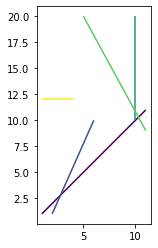

In [109]:
edges.plot(column='id')

In [21]:
%run ../settings/yaml_variables.py
%run ../settings/plotdict.py
%run ../settings/tiledict.py
%run ../settings/load_osmdata.py
%run ../settings/df_styler.py

OSM graphs loaded successfully!
OSM data loaded successfully!


In [103]:
edges_subset = osm_edges.loc[~(osm_edges.tunnel.isin(['yes','Yes',True,'passage','building_passage','movable']) | osm_edges.bridge.isin(['yes','Yes',True,'passage','building_passage','movable']) )].copy()

edges_subset['intersection_issues'] = osm_edges.apply(lambda x: check_intersections_new(row = x, gdf=edges_subset), axis=1)

count_intersection_issues = len(edges_subset.loc[(edges_subset.intersection_issues.notna()) & edges_subset.intersection_issues > 0])/2 # The number of issues is counted twice since both intersecting osm_edges are returned

print(f'{count_intersection_issues:.0f} place(s) appear to be missing an intersection node or a bridge/tunnel tag.')

1 place(s) appear to be missing an intersection node or a bridge/tunnel tag.


In [ ]:
# Alternative - shorten line